# Desafio Labdata Churn - Kaggle - Início dos trabalhos: 07 - 11 - 2020

---


## 1. Análise dos Dados - Início

---



# Carregamento e Visualização dos Dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pprint import pprint

In [2]:
# Função para mostrar missing values
def mostra_missing_value(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = 100*round((df.isnull().sum()/df.isnull().count()).sort_values(ascending = False), 2)
    missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percentual'])
    print(missing_data.head(10))

In [3]:
# Função para plotar o Boxplot
def boxplot_churn(df, column):
    plt.rcdefaults()
    sns.catplot(x = 'churn', y = column, kind = "box", data = df, height = 4, aspect = 1.5)
    
    # add data points to boxplot with stripplot
    sns.stripplot(x = 'churn', y = column, data = df, alpha = 0.3, jitter = 0.2, color = 'k');
    plt.show()

In [4]:
# Carregando o dataframe de Treino e df_teste
df_treino = pd.read_csv('/content/train.csv')
df_teste = pd.read_csv('/content/test.csv')
df_treino.columns = df_treino.columns.str.lower()
df_teste.columns = df_teste.columns.str.lower()
df_treino.head(3)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0


In [5]:
# Dimensão do df_treino
df_treino.shape, df_teste.shape

((5634, 21), (1409, 20))

DataFrame Treino possui 21 colunas e 5634 linhas \
DataFrame Teste possui 20 colunas e 1409 linhas

In [6]:
# NATUREZA DOS DADOS NO DF_TREINO
colunas = df_treino.columns
colunas

Index(['id', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [7]:
# Verificando as tipicidades das informações dentro de cada variável, excluindo a id

for i in colunas:
  if i != 'id':
    print(df_treino[i].value_counts())



Male      2849
Female    2785
Name: gender, dtype: int64
0    4740
1     894
Name: seniorcitizen, dtype: int64
No     2902
Yes    2732
Name: partner, dtype: int64
No     3793
Yes    1623
Name: dependents, dtype: int64
1.0     438
72.0    259
2.0     166
3.0     149
4.0     132
       ... 
33.0     43
39.0     40
36.0     40
44.0     39
0.0       8
Name: tenure, Length: 73, dtype: int64
Yes    5082
No      552
Name: phoneservice, dtype: int64
No                  2692
Yes                 2390
No phone service     552
Name: multiplelines, dtype: int64
Fiber optic    2451
DSL            1959
No             1224
Name: internetservice, dtype: int64
No                     2763
Yes                    1647
No internet service    1224
Name: onlinesecurity, dtype: int64
No                     2488
Yes                    1922
No internet service    1224
Name: onlinebackup, dtype: int64
No                     2480
Yes                    1930
No internet service    1224
Name: deviceprotection, dtype

# TRATANDO AS VARIÁVEIS
 Conhecendo e tratando as **variáveis**




In [8]:
# Verificando missing values expressos nas variáveis:
df_treino.isna().sum()

id                    0
gender                0
seniorcitizen         0
partner               0
dependents          218
tenure              461
phoneservice          0
multiplelines         0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
contract              0
paperlessbilling      0
paymentmethod        99
monthlycharges        0
totalcharges          0
churn                 0
dtype: int64

### As variáveis que possuem Missing Values são:
Serão tratados cada um na sua etapa

dependentes com 218 

tenure com 461

paymentmethod com 99

# copia do dataframe df_treino para df_treino1

###INÍCIO TRATAMENTO VARIÁVEL GENDER (SEXO)

In [9]:
# Variável GENDER
# Vamos transformá-la com labelencoder em binário
# COPIA DO DATAFRAME DE TREINO PARA O TRATAMENTO
df_treino1 = df_treino.copy()
df_treino1['gender'].value_counts()

Male      2849
Female    2785
Name: gender, dtype: int64

In [10]:
# PARA O DF_TESTE
df_teste1 = df_teste.copy()
df_teste1['gender'].value_counts()


Male      706
Female    703
Name: gender, dtype: int64

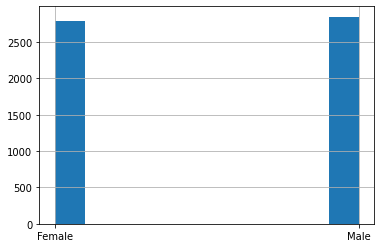

In [11]:
# Dataframe está balanceado.
df_treino1['gender'].hist();

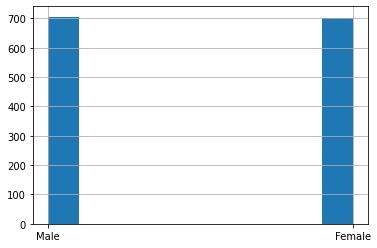

In [12]:
# Dataframe está balanceado.
df_teste1['gender'].hist();

In [13]:
# transformação com LabelEncoder. Criada Coluna gender_le: '0' -> Female e '1' -> Male
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_treino1['gender_le'] = le.fit_transform(df_treino1['gender'])
df_treino1.head()


,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,gender_le
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,1
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,1


In [14]:
# PARA DATAFRAME TESTE
# transformação com LabelEncoder. Criada Coluna gender_le: '0' -> Female e '1' -> Male
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_teste1['gender_le'] = le.fit_transform(df_teste1['gender'])
df_teste1.head()


,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender_le
0,5027,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,1
1,1733,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3,1
2,5384,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,1
3,6554,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,0
4,364,Female,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,0


In [15]:
# Confirmando a transformação label Encoder da gender:
print(df_treino1['gender_le'].value_counts())
print('  ')
print(df_treino['gender'].value_counts())


1    2849
0    2785
Name: gender_le, dtype: int64
  
Male      2849
Female    2785
Name: gender, dtype: int64


In [16]:
# PARA DF TESTE
# Confirmando a transformação label Encoder da gender:
print(df_teste1['gender_le'].value_counts())
print('  ')
print(df_teste['gender'].value_counts())


1    706
0    703
Name: gender_le, dtype: int64
  
Male      706
Female    703
Name: gender, dtype: int64


In [17]:
df_treino1['gender'] = df_treino1['gender_le']
#  df_treino1.drop(columns = 'gender_le', axis = 0)   não funcionou ver depois
df_treino1.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,gender_le
0,4030,0,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0
1,6731,1,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,1
2,6479,0,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,0
3,6861,0,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0
4,3266,1,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,1


In [18]:
# PARA DF TESTE



In [19]:
#PARA DF TESTE
df_teste1['gender'] = df_teste1['gender_le']
#  df_treino1.drop(columns = 'gender_le', axis = 0)   não funcionou ver depois
df_teste1.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender_le
0,5027,1,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,1
1,1733,1,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3,1
2,5384,1,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,1
3,6554,0,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,0
4,364,0,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,0


In [20]:
df_treino1['gender'].describe()

count    5634.000000
mean        0.505680
std         0.500012
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

In [21]:
df_teste1['gender'].describe()

count    1409.000000
mean        0.501065
std         0.500176
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

In [22]:
# VER SE NÃO HÁ MISSING VALUES
df_treino['gender'].isna().sum()

0

In [23]:
# DF TESTE
# VER SE NÃO HÁ MISSING VALUES
df_teste1['gender'].isna().sum()

0

## VARIÁVEL SeniorCitizen

In [24]:
# Vejamos a distribuição da SeniorCitizen (IDOSO)
df_treino1['seniorcitizen'].value_counts()

0    4740
1     894
Name: seniorcitizen, dtype: int64

In [25]:
# df teste
# Vejamos a distribuição da SeniorCitizen (IDOSO)
df_teste1['seniorcitizen'].value_counts()

0    1161
1     248
Name: seniorcitizen, dtype: int64

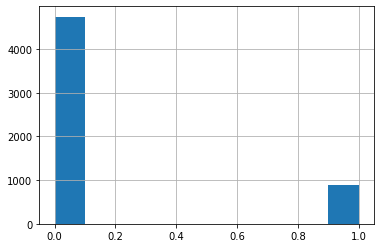

In [26]:
# Está desbalanceado.
df_treino1['seniorcitizen'].hist();

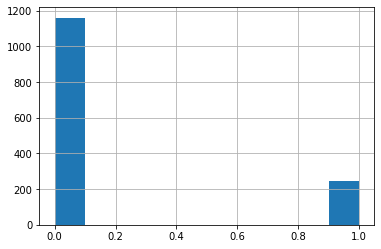

In [27]:
# df teste
# Está desbalanceado.
df_teste1['seniorcitizen'].hist();

In [28]:
print(f'Percentual de Idosos (SeniorCitizen) = 1: ', 
      (100*((df_treino1['seniorcitizen']==1).sum())/((df_treino1['seniorcitizen']).count())).round(2), ' %')

Percentual de Idosos (SeniorCitizen) = 1:  15.87  %


In [29]:
# Parece que a variável 0 ou 1 é float64. Vamos transformá-la em categórica
df_treino1['seniorcitizen'].describe()

count    5634.000000
mean        0.158679
std         0.365409
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: seniorcitizen, dtype: float64

In [30]:
# df teste
# Parece que a variável 0 ou 1 é float64. Vamos transformá-la em categórica
df_teste1['seniorcitizen'].describe()

count    1409.000000
mean        0.176011
std         0.380965
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: seniorcitizen, dtype: float64

In [31]:
# Em princípio, consegui transformar em categórica 0 e 1 (não idoso e Idoso)
df_treino1['seniorcitizen'] = df_treino1['seniorcitizen'].astype('category')
df_treino1['seniorcitizen'].describe()

count     5634
unique       2
top          0
freq      4740
Name: seniorcitizen, dtype: int64

In [32]:
# df teste
# Em princípio, consegui transformar em categórica 0 e 1 (não idoso e Idoso)
df_teste1['seniorcitizen'] = df_teste1['seniorcitizen'].astype('category')
df_teste1['seniorcitizen'].describe()

count     1409
unique       2
top          0
freq      1161
Name: seniorcitizen, dtype: int64

# Tratamento da Variável 'partner'  (traduzindo: parceiro)

In [33]:
df_treino1.columns

Index(['id', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn', 'gender_le'],
      dtype='object')

In [34]:
# Variável tipo binário
df_treino1['partner'].value_counts()

No     2902
Yes    2732
Name: partner, dtype: int64

In [35]:
# Não tem missing values
df_treino1['partner'].isnull().sum()

0

In [36]:
#df teste
# Não tem missing values
df_teste1['partner'].isnull().sum()

0

In [37]:
# Vamos aplicar o EncoderLabel
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
df_treino1['partner_le'] = le.fit_transform(df_treino1['partner'])
df_treino1.head()


,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,gender_le,partner_le
0,4030,0,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0,0
1,6731,1,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,1,1
2,6479,0,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,0,1
3,6861,0,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0,0
4,3266,1,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,1,1


In [38]:
# df teste
# Vamos aplicar o EncoderLabel
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
df_teste1['partner_le'] = le.fit_transform(df_teste1['partner'])
df_teste1.head()


,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender_le,partner_le
0,5027,1,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,1,1
1,1733,1,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3,1,1
2,5384,1,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,1,0
3,6554,0,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,0,1
4,364,0,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,0,0


In [39]:
df_treino1['partner'] = df_treino1['partner_le']
df_treino1.head(5)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,gender_le,partner_le
0,4030,0,0,0,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0,0
1,6731,1,0,1,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,1,1
2,6479,0,0,1,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,0,1
3,6861,0,0,0,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0,0
4,3266,1,0,1,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,1,1


In [40]:
# df teste
df_teste1['partner'] = df_teste1['partner_le']
df_teste1.head(5)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender_le,partner_le
0,5027,1,0,1,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,1,1
1,1733,1,1,1,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3,1,1
2,5384,1,0,0,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,1,0
3,6554,0,0,1,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,0,1
4,364,0,0,0,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,0,0


In [41]:
df_treino1.drop(columns = 'gender_le', axis = 1, inplace = True)
df_treino1.drop(columns = 'partner_le', axis = 1, inplace = True)
df_treino1.head(5)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,1,0,1,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,0,0,1,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,0,0,0,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,1,0,1,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [42]:
# df teste
df_teste1.drop(columns = 'gender_le', axis = 1, inplace = True)
df_teste1.drop(columns = 'partner_le', axis = 1, inplace = True)
df_teste1.head(5)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,1,0,1,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,1,1,1,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,1,0,0,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,0,0,1,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,0,0,0,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


In [43]:
# Variável partner balanceada
df_treino1['partner'].value_counts()

0    2902
1    2732
Name: partner, dtype: int64

In [44]:
# df teste
# Variável partner balanceada
df_teste1['partner'].value_counts()

0    739
1    670
Name: partner, dtype: int64

# VARIÁVEL: Dependents  (tradução: dependentes)

In [45]:
# O balanceamento não é dos melhores (30% e 70% aprox)
# É variável categórica binária. Vamos fazer o labelencoder
df_treino1['dependents'].value_counts()

No     3793
Yes    1623
Name: dependents, dtype: int64

In [46]:
# df teste
# O balanceamento não é dos melhores (30% e 70% aprox)
# É variável categórica binária. Vamos fazer o labelencoder
df_teste1['dependents'].value_counts()

No     953
Yes    415
Name: dependents, dtype: int64

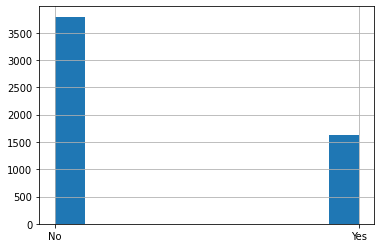

In [47]:
df_treino1['dependents'].hist();

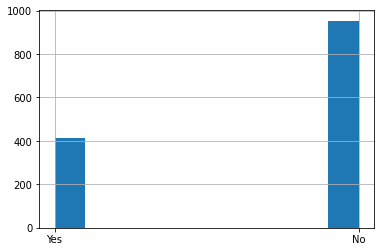

In [48]:
#df teste
df_teste1['dependents'].hist();

### Missing Values: Critério que utilizarei: Normalmente, quando se tem dependentes viajando junto, se preocupa em informar. Então se a omissão da informação veio do homem, é provável que não se preocupou e não preencheu a informação. Vou colocar No para todos os missing values

In [49]:
# Missing Values em dependents
df_treino1['dependents'] = df_treino1['dependents'].fillna('No')

In [50]:
# df teste
# Missing Values em dependents
df_teste1['dependents'] = df_teste1['dependents'].fillna('No')

In [51]:
mostra_missing_value(df_treino1)

                Total  Percentual
tenure            461         8.0
paymentmethod      99         2.0
churn               0         0.0
onlinesecurity      0         0.0
gender              0         0.0
seniorcitizen       0         0.0
partner             0         0.0
dependents          0         0.0
phoneservice        0         0.0
multiplelines       0         0.0


In [52]:
# df teste
mostra_missing_value(df_teste1)

                 Total  Percentual
tenure             118         8.0
paymentmethod       30         2.0
totalcharges         0         0.0
internetservice      0         0.0
gender               0         0.0
seniorcitizen        0         0.0
partner              0         0.0
dependents           0         0.0
phoneservice         0         0.0
multiplelines        0         0.0


In [53]:
df_treino1['dependents'].value_counts()

No     4011
Yes    1623
Name: dependents, dtype: int64

In [54]:
# df teste
df_teste1['dependents'].value_counts()

No     994
Yes    415
Name: dependents, dtype: int64

In [55]:
# Transformando em categorias label encoder a variável dependents (NO = 0 e SIM = 1)
le = LabelEncoder()
df_treino1['dependents_le'] = le.fit_transform(df_treino1['dependents'])
df_treino1.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,dependents_le
0,4030,0,0,0,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0
1,6731,1,0,1,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,1
2,6479,0,0,1,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,0
3,6861,0,0,0,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0
4,3266,1,0,1,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,1


In [56]:
# df teste
# Transformando em categorias label encoder a variável dependents (NO = 0 e SIM = 1)
le = LabelEncoder()
df_teste1['dependents_le'] = le.fit_transform(df_teste1['dependents'])
df_teste1.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,dependents_le
0,5027,1,0,1,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,1
1,1733,1,1,1,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3,1
2,5384,1,0,0,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,0
3,6554,0,0,1,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,1
4,364,0,0,0,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,0


In [57]:
df_treino1['dependents'] = df_treino1['dependents_le']
df_treino1.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,dependents_le
0,4030,0,0,0,0,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0
1,6731,1,0,1,1,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,1
2,6479,0,0,1,0,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,0
3,6861,0,0,0,0,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0
4,3266,1,0,1,1,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,1


In [58]:
# df teste
df_teste1['dependents'] = df_teste1['dependents_le']
df_teste1.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,dependents_le
0,5027,1,0,1,1,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,1
1,1733,1,1,1,1,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3,1
2,5384,1,0,0,0,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,0
3,6554,0,0,1,1,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,1
4,364,0,0,0,0,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,0


In [59]:
df_treino1.drop(columns = 'dependents_le', axis = 1, inplace = True)
df_treino1.head(5)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,1,0,1,1,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,0,0,1,0,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,0,0,0,0,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,1,0,1,1,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [60]:
# df teste
df_teste1.drop(columns = 'dependents_le', axis = 1, inplace = True)
df_teste1.head(5)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,1,0,1,1,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,1,1,1,1,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,1,0,0,0,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,0,0,1,1,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,0,0,0,0,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


# VARIÁVEL: TENURE   (Tenho que é o tempo de permanência do cliente)
> Bloco com recuo



In [61]:
df_treino['tenure'].value_counts()

1.0     438
72.0    259
2.0     166
3.0     149
4.0     132
       ... 
33.0     43
39.0     40
36.0     40
44.0     39
0.0       8
Name: tenure, Length: 73, dtype: int64

In [62]:
# df teste
df_teste['tenure'].value_counts()

1.0     122
72.0     68
2.0      50
3.0      35
4.0      32
       ... 
43.0      7
44.0      6
28.0      5
38.0      5
0.0       3
Name: tenure, Length: 73, dtype: int64

In [63]:
df_treino1['tenure'].describe()

count    5173.000000
mean       32.332882
std        24.463607
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [64]:
#df teste
df_teste1['tenure'].describe()

count    1291.000000
mean       32.460883
std        24.843710
min         0.000000
25%         9.000000
50%        29.000000
75%        57.000000
max        72.000000
Name: tenure, dtype: float64

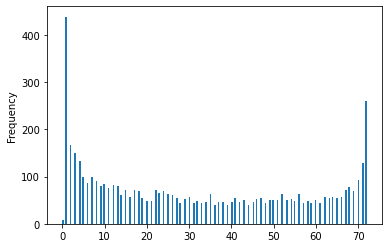

In [65]:
df_treino1['tenure'].plot(kind = 'hist', bins = 200) # O que são bins?

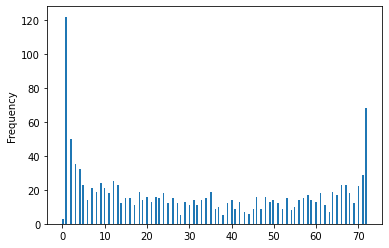

In [66]:
#df teste
df_teste1['tenure'].plot(kind = 'hist', bins = 200) # O que são bins?

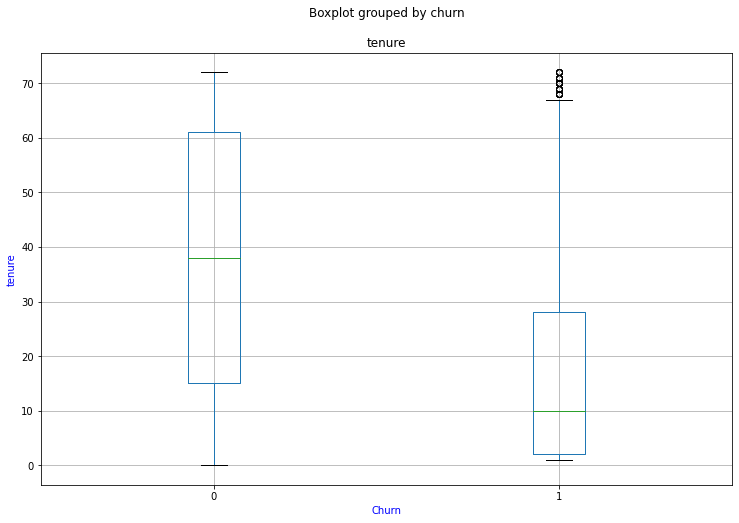

In [67]:
df_treino1.boxplot(column = 'tenure', by = 'churn', figsize = (12, 8))
plt.xlabel('Churn', fontsize = 10, color= 'blue')
plt.ylabel('tenure', fontsize = 10, color= 'blue')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


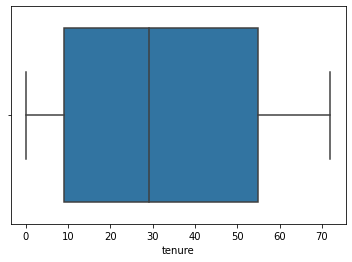

In [68]:
# Vamos ver outliers eventuais:
# Olhando no geral, não há outliers, mas quando olha-se separando por churn, parece que haveria.
sns.boxplot(df_treino1['tenure'])


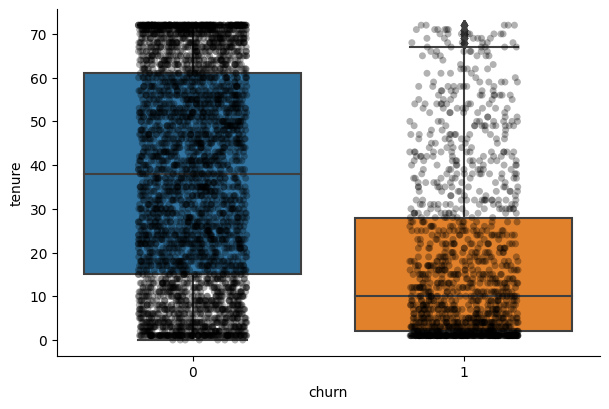

In [69]:
boxplot_churn(df_treino1, 'tenure')

In [70]:
mostra_missing_value(df_treino1)

                Total  Percentual
tenure            461         8.0
paymentmethod      99         2.0
churn               0         0.0
onlinesecurity      0         0.0
gender              0         0.0
seniorcitizen       0         0.0
partner             0         0.0
dependents          0         0.0
phoneservice        0         0.0
multiplelines       0         0.0


In [71]:
# df teste
mostra_missing_value(df_teste1)

                 Total  Percentual
tenure             118         8.0
paymentmethod       30         2.0
totalcharges         0         0.0
internetservice      0         0.0
gender               0         0.0
seniorcitizen        0         0.0
partner              0         0.0
dependents           0         0.0
phoneservice         0         0.0
multiplelines        0         0.0


### Vamos tratar os MISSING VALUES e depois verificar se há outliers e então NORMALIZAR a variável

*   Item da lista
*   Item da lista



In [72]:
df_treino1['tenure'].isnull().sum()

461

In [73]:
# df teste
df_teste1['tenure'].isnull().sum()

118

In [74]:
df_treino1['tenure'].describe()

count    5173.000000
mean       32.332882
std        24.463607
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [75]:
df_treino1['tenure'].median()

29.0

In [76]:
# Como se trata de tempo de permanência, vamos colocar a mediana nos valores missing
df_treino1['tenure'] = df_treino1['tenure'].fillna(df_treino1['tenure'].median())

In [77]:
#df teste
# Como se trata de tempo de permanência, vamos colocar a mediana nos valores missing
df_teste1['tenure'] = df_teste1['tenure'].fillna(df_teste1['tenure'].median())

In [78]:
df_teste1['tenure'].isnull().sum()

0

In [79]:
# df_treino
df_treino2 = df_treino1.copy()

In [80]:
#df teste
df_teste2 = df_teste1.copy()

In [81]:
# Cálculo dos Quartis:
q1_tenure, q3_tenure = df_treino2['tenure'].quantile([0.25,0.75]).to_list()
iqr_tenure = q3_tenure - q1_tenure
print('q1 = ',q1_tenure, '\n'
      'q3 = ', q3_tenure)
print('iqr tenure = ',iqr_tenure)
print('mínimo tenure: ', df_treino2['tenure'].min())
print('maximo tenure: ', df_treino2['tenure'].max())

q1 =  10.0 
q3 =  53.0
iqr tenure =  43.0
mínimo tenure:  0.0
maximo tenure:  72.0


In [82]:
# Verificando os outliers
outlier_tenure_inferior = q1_tenure - 1.5 * iqr_tenure
outlier_tenure_superior = q3_tenure + 1.5 * iqr_tenure

df_outliers_tenure = df_treino2[['tenure']]

# Salários outliers inferiores
df_outliers_tenure[df_outliers_tenure['tenure'] < outlier_tenure_inferior]

,tenure


In [83]:
df_outliers_tenure[df_outliers_tenure['tenure'] > outlier_tenure_superior]

,tenure


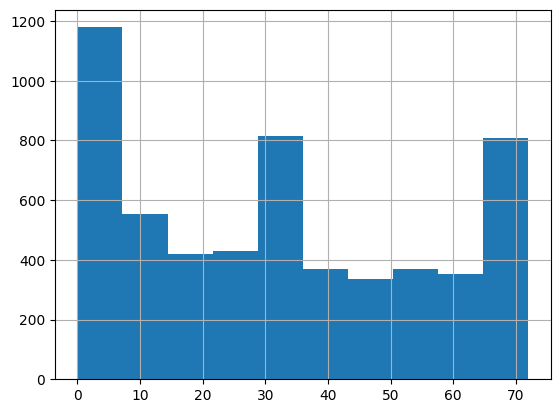

In [84]:
df_treino2['tenure'].hist()

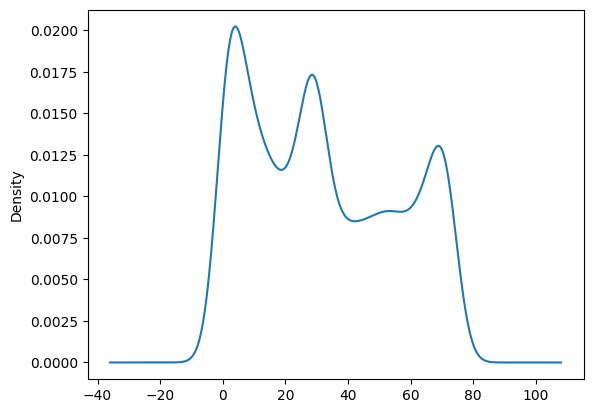

In [85]:
df_treino2['tenure'].plot(kind = 'kde')

In [86]:
df_tenure = pd.DataFrame(df_treino2['tenure'])
df_tenure.head()

                    

,tenure
0,56.0
1,29.0
2,60.0
3,37.0
4,29.0


In [87]:
df_treino2.columns

Index(['id', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [88]:
df_treino2.head(2)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,1,0,1,1,29.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0


##VARIÁVEL : phoneservice

In [89]:
df_treino2['phoneservice'].value_counts()

Yes    5082
No      552
Name: phoneservice, dtype: int64

In [90]:
le = LabelEncoder()
df_treino2['phoneservice_le'] = le.fit_transform(df_treino2['phoneservice'])
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,phoneservice_le
0,4030,0,0,0,0,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0
1,6731,1,0,1,1,29.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,1
2,6479,0,0,1,0,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,1
3,6861,0,0,0,0,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,1
4,3266,1,0,1,1,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,1


In [91]:
#df teste
le = LabelEncoder()
df_teste2['phoneservice_le'] = le.fit_transform(df_teste2['phoneservice'])
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,phoneservice_le
0,5027,1,0,1,1,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,1
1,1733,1,1,1,1,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3,1
2,5384,1,0,0,0,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,1
3,6554,0,0,1,1,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,0
4,364,0,0,0,0,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,1


In [92]:
df_treino2['phoneservice'] = df_treino2['phoneservice_le']
df_treino2 = df_treino2.drop(columns = 'phoneservice_le', axis = 1)
df_treino2.head(5)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,0,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,1,0,1,1,29.0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,0,0,1,0,60.0,1,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,0,0,0,0,37.0,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,1,0,1,1,29.0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [93]:
#df teste
df_teste2['phoneservice'] = df_teste2['phoneservice_le']
df_teste2 = df_teste2.drop(columns = 'phoneservice_le', axis = 1)
df_teste2.head(5)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,1,0,1,1,23.0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,1,1,1,1,61.0,1,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,1,0,0,0,36.0,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,0,0,1,1,61.0,0,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,0,0,0,0,47.0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


# Variável: multiplelines

In [94]:
df_treino2['multiplelines'].value_counts()

No                  2692
Yes                 2390
No phone service     552
Name: multiplelines, dtype: int64

In [95]:
le = LabelEncoder()
df_treino2['multiplelines_le'] = le.fit_transform(df_treino2['multiplelines'])
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,multiplelines_le
0,4030,0,0,0,0,56.0,0,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,1
1,6731,1,0,1,1,29.0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,0
2,6479,0,0,1,0,60.0,1,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,2
3,6861,0,0,0,0,37.0,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,2
4,3266,1,0,1,1,29.0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,0


In [96]:
#df teste
le = LabelEncoder()
df_teste2['multiplelines_le'] = le.fit_transform(df_teste2['multiplelines'])
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,multiplelines_le
0,5027,1,0,1,1,23.0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,0
1,1733,1,1,1,1,61.0,1,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3,2
2,5384,1,0,0,0,36.0,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,2
3,6554,0,0,1,1,61.0,0,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,1
4,364,0,0,0,0,47.0,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,0


In [97]:
df_treino2['multiplelines'] = df_treino2['multiplelines_le']
df_treino2.drop(columns = 'multiplelines_le', axis=1, inplace=True)
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,0,1,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,1,0,1,1,29.0,1,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,0,0,1,0,60.0,1,2,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,0,0,0,0,37.0,1,2,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,1,0,1,1,29.0,1,0,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [98]:
#df teste
df_teste2['multiplelines'] = df_teste2['multiplelines_le']
df_teste2.drop(columns = 'multiplelines_le', axis=1, inplace=True)
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,1,0,1,1,23.0,1,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,1,1,1,1,61.0,1,2,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,1,0,0,0,36.0,1,2,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,0,0,1,1,61.0,0,1,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,0,0,0,0,47.0,1,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


In [99]:
df_treino2.columns

Index(['id', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [100]:
#df teste
df_teste2.columns

Index(['id', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges'],
      dtype='object')

In [101]:
df_treino2['internetservice'].value_counts()

Fiber optic    2451
DSL            1959
No             1224
Name: internetservice, dtype: int64

In [102]:
#df teste
df_teste2['internetservice'].value_counts()

Fiber optic    645
DSL            462
No             302
Name: internetservice, dtype: int64

#Todas ad demais variáveis categóricas:

'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod'


In [103]:
le = LabelEncoder()
df_treino2['internetservice_le'] = le.fit_transform(df_treino2['internetservice'])
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,internetservice_le
0,4030,0,0,0,0,56.0,0,1,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0,0
1,6731,1,0,1,1,29.0,1,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,2
2,6479,0,0,1,0,60.0,1,2,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,1
3,6861,0,0,0,0,37.0,1,2,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,1
4,3266,1,0,1,1,29.0,1,0,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,1


In [104]:
#df teste
le = LabelEncoder()
df_teste2['internetservice_le'] = le.fit_transform(df_teste2['internetservice'])
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,internetservice_le
0,5027,1,0,1,1,23.0,1,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,2
1,1733,1,1,1,1,61.0,1,2,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3,1
2,5384,1,0,0,0,36.0,1,2,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,1
3,6554,0,0,1,1,61.0,0,1,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,0
4,364,0,0,0,0,47.0,1,0,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,2


In [105]:
df_treino2['internetservice'] = df_treino2['internetservice_le']
df_treino2.drop(columns = 'internetservice_le', axis = 1, inplace = True)

In [106]:
#df teste
df_teste2['internetservice'] = df_teste2['internetservice_le']
df_teste2.drop(columns = 'internetservice_le', axis = 1, inplace = True)

In [107]:
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,1,0,1,1,23.0,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,1,1,1,1,61.0,1,2,1,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,1,0,0,0,36.0,1,2,1,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,0,0,1,1,61.0,0,1,0,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,0,0,0,0,47.0,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


In [108]:
df_treino2['paymentmethod'].value_counts()

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: paymentmethod, dtype: int64

In [109]:
#df teste
df_teste2['paymentmethod'].value_counts()

Electronic check             430
Credit card (automatic)      329
Mailed check                 313
Bank transfer (automatic)    307
Name: paymentmethod, dtype: int64

In [110]:
df_treino2['paymentmethod'].isnull().sum()

99

In [111]:
#df teste
df_teste2['paymentmethod'].isnull().sum()

30

In [112]:
df_treino2['paymentmethod'].describe()

count                 5535
unique                   4
top       Electronic check
freq                  1887
Name: paymentmethod, dtype: object

In [113]:
#df teste
df_teste2['paymentmethod'].describe()

count                 1379
unique                   4
top       Electronic check
freq                   430
Name: paymentmethod, dtype: object

In [114]:
df_treino2['paymentmethod'] = df_treino2['paymentmethod'].fillna('Electronic check')
df_treino2['paymentmethod'].isnull().sum()

0

In [115]:
#df teste
df_teste2['paymentmethod'] = df_teste2['paymentmethod'].fillna('Electronic check')
df_teste2['paymentmethod'].isnull().sum()

0

In [116]:
le = LabelEncoder()
df_treino2['paymentmethod_le'] = le.fit_transform(df_treino2['paymentmethod'])
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,paymentmethod_le
0,4030,0,0,0,0,56.0,0,1,0,Yes,Yes,Yes,Yes,No,No,Two year,No,Electronic check,45.05,2560.1,0,2
1,6731,1,0,1,1,29.0,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0,3
2,6479,0,0,1,0,60.0,1,2,1,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0,1
3,6861,0,0,0,0,37.0,1,2,1,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1,0
4,3266,1,0,1,1,29.0,1,0,1,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1,2


In [117]:
#df teste
le = LabelEncoder()
df_teste2['paymentmethod_le'] = le.fit_transform(df_teste2['paymentmethod'])
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,paymentmethod_le
0,5027,1,0,1,1,23.0,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,1
1,1733,1,1,1,1,61.0,1,2,1,No,Yes,No,No,Yes,Yes,One year,No,Electronic check,99.00,5969.3,2
2,5384,1,0,0,0,36.0,1,2,1,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15,2
3,6554,0,0,1,1,61.0,0,1,0,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,0
4,364,0,0,0,0,47.0,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7,3


In [118]:
df_treino2['paymentmethod'] = df_treino2['paymentmethod_le']
df_treino2.drop(columns= 'paymentmethod_le', axis=1, inplace=True)
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,0,1,0,Yes,Yes,Yes,Yes,No,No,Two year,No,2,45.05,2560.1,0
1,6731,1,0,1,1,29.0,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,3,19.65,332.65,0
2,6479,0,0,1,0,60.0,1,2,1,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,1,110.80,6640.7,0
3,6861,0,0,0,0,37.0,1,2,1,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,0,101.90,3545.35,1
4,3266,1,0,1,1,29.0,1,0,1,No,No,No,No,No,No,Month-to-month,Yes,2,70.75,1974.8,1


In [119]:
#df teste
df_teste2['paymentmethod'] = df_teste2['paymentmethod_le']
df_teste2.drop(columns= 'paymentmethod_le', axis=1, inplace=True)
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,1,0,1,1,23.0,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,1,20.00,445.3
1,1733,1,1,1,1,61.0,1,2,1,No,Yes,No,No,Yes,Yes,One year,No,2,99.00,5969.3
2,5384,1,0,0,0,36.0,1,2,1,No,No,No,No,No,Yes,Month-to-month,Yes,2,84.75,3050.15
3,6554,0,0,1,1,61.0,0,1,0,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,0,61.45,3751.15
4,364,0,0,0,0,47.0,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,3,20.55,945.7


In [120]:
lista_features = ['onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']


In [121]:
#df teste
lista_features = ['onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']


In [122]:
for i in lista_features:
  le = LabelEncoder()
  df_treino2[i +'_le'] = le.fit_transform(df_treino2[i])
  df_treino2.head()


In [123]:
# df teste
for i in lista_features:
  le = LabelEncoder()
  df_teste2[i +'_le'] = le.fit_transform(df_teste2[i])
  df_teste2.head()


In [124]:
for i in lista_features:
  df_treino2[i] = df_treino2[i+'_le']
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,onlinesecurity_le,onlinebackup_le,deviceprotection_le,techsupport_le,streamingtv_le,streamingmovies_le,contract_le,paperlessbilling_le,paymentmethod_le
0,4030,0,0,0,0,56.0,0,1,0,2,2,2,2,0,0,2,0,2,45.05,2560.1,0,2,2,2,2,0,0,2,0,2
1,6731,1,0,1,1,29.0,1,0,2,1,1,1,1,1,1,1,0,3,19.65,332.65,0,1,1,1,1,1,1,1,0,3
2,6479,0,0,1,0,60.0,1,2,1,0,2,2,2,2,2,2,1,1,110.80,6640.7,0,0,2,2,2,2,2,2,1,1
3,6861,0,0,0,0,37.0,1,2,1,0,2,2,0,2,2,0,1,0,101.90,3545.35,1,0,2,2,0,2,2,0,1,0
4,3266,1,0,1,1,29.0,1,0,1,0,0,0,0,0,0,0,1,2,70.75,1974.8,1,0,0,0,0,0,0,0,1,2


In [125]:
# df teste
for i in lista_features:
  df_teste2[i] = df_teste2[i+'_le']
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,onlinesecurity_le,onlinebackup_le,deviceprotection_le,techsupport_le,streamingtv_le,streamingmovies_le,contract_le,paperlessbilling_le,paymentmethod_le
0,5027,1,0,1,1,23.0,1,0,2,1,1,1,1,1,1,1,1,1,20.00,445.3,1,1,1,1,1,1,1,1,1
1,1733,1,1,1,1,61.0,1,2,1,0,2,0,0,2,2,1,0,2,99.00,5969.3,0,2,0,0,2,2,1,0,2
2,5384,1,0,0,0,36.0,1,2,1,0,0,0,0,0,2,0,1,2,84.75,3050.15,0,0,0,0,0,2,0,1,2
3,6554,0,0,1,1,61.0,0,1,0,0,2,2,2,2,2,2,1,0,61.45,3751.15,0,2,2,2,2,2,2,1,0
4,364,0,0,0,0,47.0,1,0,2,1,1,1,1,1,1,2,1,3,20.55,945.7,1,1,1,1,1,1,2,1,3


In [126]:
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,onlinesecurity_le,onlinebackup_le,deviceprotection_le,techsupport_le,streamingtv_le,streamingmovies_le,contract_le,paperlessbilling_le,paymentmethod_le
0,4030,0,0,0,0,56.0,0,1,0,2,2,2,2,0,0,2,0,2,45.05,2560.1,0,2,2,2,2,0,0,2,0,2
1,6731,1,0,1,1,29.0,1,0,2,1,1,1,1,1,1,1,0,3,19.65,332.65,0,1,1,1,1,1,1,1,0,3
2,6479,0,0,1,0,60.0,1,2,1,0,2,2,2,2,2,2,1,1,110.80,6640.7,0,0,2,2,2,2,2,2,1,1
3,6861,0,0,0,0,37.0,1,2,1,0,2,2,0,2,2,0,1,0,101.90,3545.35,1,0,2,2,0,2,2,0,1,0
4,3266,1,0,1,1,29.0,1,0,1,0,0,0,0,0,0,0,1,2,70.75,1974.8,1,0,0,0,0,0,0,0,1,2


In [127]:
df_treino2.columns


Index(['id', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn', 'onlinesecurity_le',
       'onlinebackup_le', 'deviceprotection_le', 'techsupport_le',
       'streamingtv_le', 'streamingmovies_le', 'contract_le',
       'paperlessbilling_le', 'paymentmethod_le'],
      dtype='object')

In [128]:
df_treino2.drop(columns = ['onlinesecurity_le','onlinebackup_le', 'deviceprotection_le', 'techsupport_le','streamingtv_le', 'streamingmovies_le', 'contract_le',
       'paperlessbilling_le', 'paymentmethod_le'], axis = 1, inplace = True)
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,0,1,0,2,2,2,2,0,0,2,0,2,45.05,2560.1,0
1,6731,1,0,1,1,29.0,1,0,2,1,1,1,1,1,1,1,0,3,19.65,332.65,0
2,6479,0,0,1,0,60.0,1,2,1,0,2,2,2,2,2,2,1,1,110.80,6640.7,0
3,6861,0,0,0,0,37.0,1,2,1,0,2,2,0,2,2,0,1,0,101.90,3545.35,1
4,3266,1,0,1,1,29.0,1,0,1,0,0,0,0,0,0,0,1,2,70.75,1974.8,1


In [129]:
#df teste
df_teste2.drop(columns = ['onlinesecurity_le','onlinebackup_le', 'deviceprotection_le', 'techsupport_le','streamingtv_le', 'streamingmovies_le', 'contract_le',
       'paperlessbilling_le', 'paymentmethod_le'], axis = 1, inplace = True)
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,1,0,1,1,23.0,1,0,2,1,1,1,1,1,1,1,1,1,20.00,445.3
1,1733,1,1,1,1,61.0,1,2,1,0,2,0,0,2,2,1,0,2,99.00,5969.3
2,5384,1,0,0,0,36.0,1,2,1,0,0,0,0,0,2,0,1,2,84.75,3050.15
3,6554,0,0,1,1,61.0,0,1,0,0,2,2,2,2,2,2,1,0,61.45,3751.15
4,364,0,0,0,0,47.0,1,0,2,1,1,1,1,1,1,2,1,3,20.55,945.7


In [130]:
df_treino2.isnull().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [131]:
#df teste
df_teste2.isnull().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

In [132]:
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,1,0,1,1,23.0,1,0,2,1,1,1,1,1,1,1,1,1,20.00,445.3
1,1733,1,1,1,1,61.0,1,2,1,0,2,0,0,2,2,1,0,2,99.00,5969.3
2,5384,1,0,0,0,36.0,1,2,1,0,0,0,0,0,2,0,1,2,84.75,3050.15
3,6554,0,0,1,1,61.0,0,1,0,0,2,2,2,2,2,2,1,0,61.45,3751.15
4,364,0,0,0,0,47.0,1,0,2,1,1,1,1,1,1,2,1,3,20.55,945.7


In [133]:
df_teste2.isnull().sum()

id                  0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

# Vamos fazer o pycarest e ver um resultado:**negrito**

In [134]:
#!!pip install pycaret

In [135]:
#!pip install shap

In [136]:
df_treino2

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,0,1,0,2,2,2,2,0,0,2,0,2,45.05,2560.1,0
1,6731,1,0,1,1,29.0,1,0,2,1,1,1,1,1,1,1,0,3,19.65,332.65,0
2,6479,0,0,1,0,60.0,1,2,1,0,2,2,2,2,2,2,1,1,110.80,6640.7,0
3,6861,0,0,0,0,37.0,1,2,1,0,2,2,0,2,2,0,1,0,101.90,3545.35,1
4,3266,1,0,1,1,29.0,1,0,1,0,0,0,0,0,0,0,1,2,70.75,1974.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6684,1,0,0,0,43.0,0,1,0,0,0,2,2,0,2,1,0,2,44.15,1931.3,0
5630,604,1,0,0,0,29.0,1,2,1,0,2,2,2,2,2,2,0,2,108.65,4903.2,0
5631,4803,0,0,0,0,28.0,1,0,0,0,2,0,2,0,0,0,0,0,54.65,1517.5,0
5632,6317,1,0,1,1,63.0,1,2,2,1,1,1,1,1,1,2,0,3,25.25,1573.05,0


In [137]:
y = df_treino2['churn']

In [138]:
y

0       0
1       0
2       0
3       1
4       1
       ..
5629    0
5630    0
5631    0
5632    0
5633    0
Name: churn, Length: 5634, dtype: int64

In [139]:
X = df_treino2
X

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,0,1,0,2,2,2,2,0,0,2,0,2,45.05,2560.1,0
1,6731,1,0,1,1,29.0,1,0,2,1,1,1,1,1,1,1,0,3,19.65,332.65,0
2,6479,0,0,1,0,60.0,1,2,1,0,2,2,2,2,2,2,1,1,110.80,6640.7,0
3,6861,0,0,0,0,37.0,1,2,1,0,2,2,0,2,2,0,1,0,101.90,3545.35,1
4,3266,1,0,1,1,29.0,1,0,1,0,0,0,0,0,0,0,1,2,70.75,1974.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6684,1,0,0,0,43.0,0,1,0,0,0,2,2,0,2,1,0,2,44.15,1931.3,0
5630,604,1,0,0,0,29.0,1,2,1,0,2,2,2,2,2,2,0,2,108.65,4903.2,0
5631,4803,0,0,0,0,28.0,1,0,0,0,2,0,2,0,0,0,0,0,54.65,1517.5,0
5632,6317,1,0,1,1,63.0,1,2,2,1,1,1,1,1,1,2,0,3,25.25,1573.05,0


In [140]:
df_treino2[df_treino2['totalcharges'] == ' '] = 0
df_teste2[df_teste2['totalcharges'] == ' '] = 0

In [141]:
df_treino2['totalcharges'].iloc[161]

0

In [142]:
df_teste2['totalcharges'].iloc[313]

0

In [143]:
df_treino2['totalcharges'].replace(to_replace = ' ', value=0)

0        2560.1
1        332.65
2        6640.7
3       3545.35
4        1974.8
         ...   
5629     1931.3
5630     4903.2
5631     1517.5
5632    1573.05
5633     3605.6
Name: totalcharges, Length: 5634, dtype: object

In [144]:
df_treino2['totalcharges'] = pd.to_numeric(df_treino2['totalcharges'])
df_teste2['totalcharges']=pd.to_numeric(df_teste2['totalcharges'])

In [145]:
df_treino2['totalcharges'].dtype

dtype('float64')

In [146]:
df_teste2['totalcharges'].dtype

dtype('float64')

In [147]:
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,0,1,0,2,2,2,2,0,0,2,0,2,45.05,2560.10,0
1,6731,1,0,1,1,29.0,1,0,2,1,1,1,1,1,1,1,0,3,19.65,332.65,0
2,6479,0,0,1,0,60.0,1,2,1,0,2,2,2,2,2,2,1,1,110.80,6640.70,0
3,6861,0,0,0,0,37.0,1,2,1,0,2,2,0,2,2,0,1,0,101.90,3545.35,1
4,3266,1,0,1,1,29.0,1,0,1,0,0,0,0,0,0,0,1,2,70.75,1974.80,1


In [148]:
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,1,0,1,1,23.0,1,0,2,1,1,1,1,1,1,1,1,1,20.00,445.30
1,1733,1,1,1,1,61.0,1,2,1,0,2,0,0,2,2,1,0,2,99.00,5969.30
2,5384,1,0,0,0,36.0,1,2,1,0,0,0,0,0,2,0,1,2,84.75,3050.15
3,6554,0,0,1,1,61.0,0,1,0,0,2,2,2,2,2,2,1,0,61.45,3751.15
4,364,0,0,0,0,47.0,1,0,2,1,1,1,1,1,1,2,1,3,20.55,945.70


In [149]:
#from pycaret.classification import *

In [150]:
df_teste2.columns

Index(['id', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges'],
      dtype='object')

In [151]:
#clf = setup(data = df_treino2,
#            target = 'churn',
#            categorical_features = ['gender', 'seniorcitizen', 'partner', 'dependents',
#       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
#       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
#       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod'],
#            numeric_imputation = 'mean', # para tratamento dos missing values
#            session_id = 20111974, # Seed por questões de reproducibilidade
#            silent = False)

In [152]:
#compare_models()

PARAMETROS ALÇADOS PELO PYCARET

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [153]:
#catboost = create_model('catboost')

In [154]:

#cat_features = [0,1]

In [155]:
y

0       0
1       0
2       0
3       1
4       1
       ..
5629    0
5630    0
5631    0
5632    0
5633    0
Name: churn, Length: 5634, dtype: int64

In [156]:
#from catboost import CatBoostClassifier
#from catboost import Pool

In [157]:
df_treino2.head(2)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,0,1,0,2,2,2,2,0,0,2,0,2,45.05,2560.10,0
1,6731,1,0,1,1,29.0,1,0,2,1,1,1,1,1,1,1,0,3,19.65,332.65,0


In [158]:
df_semtarget = df_treino2.drop(columns = 'churn', axis = 1)
df_semtarget.head(2)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,4030,0,0,0,0,56.0,0,1,0,2,2,2,2,0,0,2,0,2,45.05,2560.10
1,6731,1,0,1,1,29.0,1,0,2,1,1,1,1,1,1,1,0,3,19.65,332.65


In [159]:
#X = Pool(data=df_semtarget, label = y, cat_features=['gender', 'seniorcitizen', 'partner', 'dependents',
#       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
#       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
#       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod'])

In [160]:
#catboost.fit(X)

In [161]:
#y_predict = catboost.predict(df_teste2)

In [162]:
#y_predict

In [163]:
#df_teste2.index

In [164]:
#predicao1 = pd.Series(y_predict)
#predicao1.head()

In [165]:
#type(predicao1)

In [166]:
#predicao1.to_csv('predicao1')

# Usando Redes Neurais H20


In [242]:
!pip install h2o

In [256]:
import h2o
from h2o.automl import H2OAutoML

from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [257]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 mins 24 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 23 days
H2O_cluster_name:,H2O_from_python_unknownUser_xu63im
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.166 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf

from tensorflow import keras

In [259]:
tf.__version__

'2.3.0'

In [260]:
np.set_printoptions(precision= 3)

In [261]:
df_treino2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,0,1,0,2,2,2,2,0,0,2,0,2,45.05,2560.10,0
1,6731,1,0,1,1,29.0,1,0,2,1,1,1,1,1,1,1,0,3,19.65,332.65,0
2,6479,0,0,1,0,60.0,1,2,1,0,2,2,2,2,2,2,1,1,110.80,6640.70,0
3,6861,0,0,0,0,37.0,1,2,1,0,2,2,0,2,2,0,1,0,101.90,3545.35,1
4,3266,1,0,1,1,29.0,1,0,1,0,0,0,0,0,0,0,1,2,70.75,1974.80,1


In [262]:
df_teste2.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,1,0,1,1,23.0,1,0,2,1,1,1,1,1,1,1,1,1,20.00,445.30
1,1733,1,1,1,1,61.0,1,2,1,0,2,0,0,2,2,1,0,2,99.00,5969.30
2,5384,1,0,0,0,36.0,1,2,1,0,0,0,0,0,2,0,1,2,84.75,3050.15
3,6554,0,0,1,1,61.0,0,1,0,0,2,2,2,2,2,2,1,0,61.45,3751.15
4,364,0,0,0,0,47.0,1,0,2,1,1,1,1,1,1,2,1,3,20.55,945.70


In [263]:
# Passando o X_treino para o h2O (OBS: ESTOU MANDANDO JUNTO A TARGET TAMBÉM)
Churn = h2o.H2OFrame(df_treino2)
Churn.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
4030,0,0,0,0,56,0,1,0,2,2,2,2,0,0,2,0,2,45.05,2560.1,0
6731,1,0,1,1,29,1,0,2,1,1,1,1,1,1,1,0,3,19.65,332.65,0
6479,0,0,1,0,60,1,2,1,0,2,2,2,2,2,2,1,1,110.8,6640.7,0
6861,0,0,0,0,37,1,2,1,0,2,2,0,2,2,0,1,0,101.9,3545.35,1
3266,1,0,1,1,29,1,0,1,0,0,0,0,0,0,0,1,2,70.75,1974.8,1
6368,1,0,0,0,70,0,1,0,2,0,2,2,0,2,2,0,0,48.4,3442.8,0
5830,1,0,1,1,31,0,1,0,2,0,2,2,2,2,1,0,2,59.95,1848.8,0
4476,0,0,0,0,3,1,0,2,1,1,1,1,1,1,0,0,2,19.55,61.05,0
1508,1,0,0,0,54,1,0,2,1,1,1,1,1,1,2,0,1,19.65,1008.7,0
2921,0,0,1,0,72,1,0,0,2,2,2,2,2,2,2,0,3,85.1,6155.4,0


In [264]:
Churn['churn'] = Churn['churn'].asfactor()


In [265]:
# Selecionar aleatoriamente 90% dos dados para a amostra de treinamento e 10% para a amostra de validação:
Churn_Treinamento, Churn_Teste= Churn.split_frame(ratios=[0.9], seed= 20111974)

In [266]:
print(Churn_Treinamento.shape, Churn_Teste.shape)


(5052, 21) (582, 21)


In [269]:
# Definindo as variáveis preditoras
preditoras = list(Churn_Treinamento.columns)
target = 'churn'
preditoras.remove(target)
preditoras.remove('id')
preditoras

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'monthlycharges',
 'totalcharges']

In [270]:
# Configurando o auto ML
h2o_Churn = H2OAutoML(max_models=30, max_runtime_secs=5000)
h2o_Churn.train(x = preditoras, y=target, training_frame = Churn_Treinamento)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [271]:
Leader_Board= h2o_Churn.leaderboard
Leader_Board.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20201120_180814,0.856434,0.411691,0.671167,0.225408,0.363646,0.132238
StackedEnsemble_BestOfFamily_AutoML_20201120_180814,0.856001,0.412855,0.670857,0.22395,0.363989,0.132488
XGBoost_grid__1_AutoML_20201120_180814_model_3,0.854998,0.406124,0.665121,0.21879,0.362786,0.131614
XGBoost_grid__1_AutoML_20201120_180814_model_8,0.854744,0.406325,0.669778,0.225813,0.36304,0.131798
GBM_grid__1_AutoML_20201120_180814_model_5,0.854681,0.406227,0.66914,0.222618,0.362853,0.131662
XGBoost_grid__1_AutoML_20201120_180814_model_1,0.854598,0.406658,0.667503,0.2272,0.363114,0.131851
GBM_5_AutoML_20201120_180814,0.854388,0.406516,0.666608,0.226906,0.362917,0.131709
GBM_grid__1_AutoML_20201120_180814_model_3,0.854099,0.407219,0.666504,0.222603,0.363076,0.131824
GBM_grid__1_AutoML_20201120_180814_model_4,0.85405,0.407209,0.668723,0.22265,0.363084,0.13183
XGBoost_grid__1_AutoML_20201120_180814_model_2,0.852351,0.410015,0.663911,0.226376,0.364798,0.133078


In [272]:
h2o_Churn.leader.model_performance(Churn_Teste)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.13671085782171716
RMSE: 0.36974431411681935
LogLoss: 0.42892458616431545
Null degrees of freedom: 581
Residual degrees of freedom: 567
Null deviance: 670.5501860887694
Residual deviance: 499.2682182952631
AIC: 529.2682182952631
AUC: 0.8320002437649496
AUCPR: 0.6703191218031209
Gini: 0.6640004875298993

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34436777275799796: 


,,0,1,Error,Rate
0,0,366.0,63.0,0.1469,(63.0/429.0)
1,1,54.0,99.0,0.3529,(54.0/153.0)
2,Total,420.0,162.0,0.201,(117.0/582.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.344368,0.628571,149.0
1,max f2,0.114672,0.737968,276.0
2,max f0point5,0.557480,0.673250,94.0
3,max accuracy,0.557480,0.821306,94.0
4,max precision,0.888713,1.000000,0.0
5,max recall,0.050485,1.000000,395.0
6,max specificity,0.888713,1.000000,0.0
7,max absolute_mcc,0.557480,0.499339,94.0
8,max min_per_class_accuracy,0.197347,0.745921,204.0
9,max mean_per_class_accuracy,0.180475,0.754856,213.0



Gains/Lift Table: Avg response rate: 26.29 %, avg score: 25.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010309,0.868291,3.169935,3.169935,0.833333,0.876801,0.833333,0.876801,0.032680,0.032680,216.993464,216.993464,0.030349
1,2,0.020619,0.854816,3.803922,3.486928,1.000000,0.860186,0.916667,0.868493,0.039216,0.071895,280.392157,248.692810,0.069564
2,3,0.030928,0.844331,3.803922,3.592593,1.000000,0.850139,0.944444,0.862375,0.039216,0.111111,280.392157,259.259259,0.108780
3,4,0.041237,0.826767,3.169935,3.486928,0.833333,0.836202,0.916667,0.855832,0.032680,0.143791,216.993464,248.692810,0.139129
4,5,0.051546,0.806532,3.169935,3.423529,0.833333,0.817036,0.900000,0.848073,0.032680,0.176471,216.993464,242.352941,0.169478
5,6,0.101375,0.697976,2.492224,2.965769,0.655172,0.759276,0.779661,0.804427,0.124183,0.300654,149.222448,196.576936,0.270351
6,7,0.151203,0.614531,2.623394,2.852941,0.689655,0.656327,0.750000,0.755621,0.130719,0.431373,162.339419,185.294118,0.380090
7,8,0.201031,0.478229,1.574037,2.535948,0.413793,0.538812,0.666667,0.701882,0.078431,0.509804,57.403651,153.594771,0.418895
8,9,0.300687,0.287235,1.574037,2.217143,0.413793,0.391553,0.582857,0.599030,0.156863,0.666667,57.403651,121.714286,0.496503
9,10,0.400344,0.181417,1.049358,1.926450,0.275862,0.225991,0.506438,0.506171,0.104575,0.771242,4.935767,92.644955,0.503177


In [273]:
Y_Predito= h2o_Churn.leader.predict(Churn_Teste)
Y_Predito

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,p0,p1
0,0.94565,0.0543505
1,0.328121,0.671879
0,0.891328,0.108672
1,0.504988,0.495012
0,0.940943,0.0590569
1,0.26808,0.73192
1,0.633163,0.366837
0,0.784217,0.215783
0,0.853398,0.146602
1,0.146937,0.853063


In [274]:
Churn_Teste

id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3379,1,0,1,0,72,1,0,0,2,2,2,2,2,2,2,0,3,84.45,6033.1,0
192,1,0,1,0,6,1,0,1,0,2,2,0,0,2,0,1,2,91,531,1
6666,1,0,1,1,43,0,1,0,0,2,0,0,0,0,0,0,1,29.3,1224.05,0
3482,0,0,0,0,4,1,2,0,0,0,0,0,0,0,0,0,2,50.7,214.55,0
6918,0,0,1,0,72,1,2,1,2,2,0,0,0,0,2,1,0,84.05,6052.25,0
4315,1,1,0,0,24,1,2,1,0,2,0,0,2,2,0,1,2,101.25,2440.15,1
5851,1,1,0,0,29,1,0,1,0,0,0,0,0,0,0,0,1,71.3,1389.2,1
5763,1,1,1,0,30,1,2,1,2,2,2,2,2,0,0,1,0,105.7,3181.8,0
6643,1,0,0,0,25,1,0,0,2,2,0,2,2,2,0,1,3,79,1902,0
1880,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,70.05,70.05,1


In [275]:
ID_Modelo_Campeao= h2o_Churn.leader.model_id
ID_Modelo_Campeao

'StackedEnsemble_AllModels_AutoML_20201120_180814'

In [276]:
Modelo_Parametros= h2o.get_model(ID_Modelo_Campeao)
Modelo_Parametros.params

{'base_models': {'actual': [{'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'XGBoost_grid__1_AutoML_20201120_180814_model_3',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'XGBoost_grid__1_AutoML_20201120_180814_model_8',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_grid__1_AutoML_20201120_180814_model_5',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'XGBoost_grid__1_AutoML_20201120_180814_model_1',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_5_AutoML_20201120_180

In [277]:
#h2o.cluster().shutdown()

In [283]:
Y_Predito.shape, df_teste2.shape

((582, 3), (1409, 20))

In [285]:
df_submissao = h2o.H2OFrame(df_teste2)
df_submissao.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
5027,1,0,1,1,23,1,0,2,1,1,1,1,1,1,1,1,1,20,445.3
1733,1,1,1,1,61,1,2,1,0,2,0,0,2,2,1,0,2,99,5969.3
5384,1,0,0,0,36,1,2,1,0,0,0,0,0,2,0,1,2,84.75,3050.15
6554,0,0,1,1,61,0,1,0,0,2,2,2,2,2,2,1,0,61.45,3751.15
364,0,0,0,0,47,1,0,2,1,1,1,1,1,1,2,1,3,20.55,945.7
2093,1,0,1,0,72,1,2,0,2,2,2,2,0,2,2,0,1,79.55,5810.9
6966,0,1,1,0,61,1,2,1,2,2,2,2,0,0,0,1,1,94.2,5895.45
5076,0,0,1,1,42,1,0,1,0,0,2,0,2,2,0,1,2,92.15,3875.4
5746,0,0,1,1,29,1,2,2,1,1,1,1,1,1,2,1,3,24.2,1445.2
5461,1,0,1,0,34,1,0,2,1,1,1,1,1,1,2,0,1,20.05,679


In [286]:
# Aplicando a predição ao df_teste2
Y_Submissao= h2o_Churn.leader.predict(df_submissao)
Y_Submissao.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,p0,p1
0,0.938788,0.0612123
0,0.858788,0.141212
1,0.477035,0.522965
0,0.943077,0.0569227
0,0.94659,0.05341
0,0.944912,0.0550881
0,0.908736,0.0912638
1,0.743769,0.256231
0,0.94457,0.0554303
0,0.948893,0.0511069


In [322]:

Y_Submissao.shape

(1409, 3)

In [326]:
Y_Submissao.drop(index = ['p0', 'p1'], axis=1)

predict
0
0
1
0
0
0
0
1
0
0


In [354]:
type(Y_Submissao)

h2o.frame.H2OFrame

In [355]:
df_submissao = Y_Submissao.as_data_frame(use_pandas=True, header=True)

In [356]:
df_submissao.shape

(1409, 3)

In [357]:
df_submissao.head()


,predict,p0,p1
0,0,0.938788,0.061212
1,0,0.858788,0.141212
2,1,0.477035,0.522965
3,0,0.943077,0.056923
4,0,0.946590,0.053410


In [358]:
df_submissao.drop(columns = ['p0', 'p1'], inplace = True)
df_submissao.head()

,predict
0,0
1,0
2,1
3,0
4,0


In [363]:
type(df_submissao)

pandas.core.frame.DataFrame

In [365]:
df_submissao.shape

(1409, 1)

In [369]:
submissao = df_submissao.values

In [370]:
type(submissao)

numpy.ndarray

In [374]:
submissao

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [385]:
df_submissao = pd.DataFrame(submissao, columns =['Churn'])
df_submissao

,Churn
0,0
1,0
2,1
3,0
4,0
...,...
1404,0
1405,0
1406,0
1407,1


In [391]:
df_submissao['id'] = df_teste2['id']


In [392]:
df_submissao

,Churn,id
0,0,5027
1,0,1733
2,1,5384
3,0,6554
4,0,364
...,...,...
1404,0,4897
1405,0,6940
1406,0,804
1407,1,1143


In [395]:
df_submissao.set_index('id', inplace=True)
df_submissao.head()

,Churn
id,
5027,0
1733,0
5384,1
6554,0
364,0


In [397]:
type(df_submissao)

pandas.core.frame.DataFrame

In [416]:
df_submissao.to_csv('predicao')

In [406]:
predicao2

<bound method NDFrame.to_csv of       Churn
id         
5027      0
1733      0
5384      1
6554      0
364       0
...     ...
4897      0
6940      0
804       0
1143      1
5773      0

[1409 rows x 1 columns]>

# FAZENDO UMA REDE NEURAL AGORA

In [1432]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [1433]:
df_treino3 = df_treino2.copy()
df_teste3 = df_teste2.copy()
df_treino3.head()


,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,0,0,0,0,56.0,0,1,0,2,2,2,2,0,0,2,0,2,45.05,2560.10,0
1,6731,1,0,1,1,29.0,1,0,2,1,1,1,1,1,1,1,0,3,19.65,332.65,0
2,6479,0,0,1,0,60.0,1,2,1,0,2,2,2,2,2,2,1,1,110.80,6640.70,0
3,6861,0,0,0,0,37.0,1,2,1,0,2,2,0,2,2,0,1,0,101.90,3545.35,1
4,3266,1,0,1,1,29.0,1,0,1,0,0,0,0,0,0,0,1,2,70.75,1974.80,1


In [1434]:
# Número de Neurônios na Input Layer:
N_I = 19 # Número de variáveis/colunas da matriz de preditoras

# Número de neurônios na Output Layer:
N_O = 1

# Número de neurônios na Hidden Layer:
N_H = 64


# Número de neurônios na Hidden Layer2:
N_H2 = 128

# Número de neurônios na Hidden Layer2:
N_H3 = 64

# Número de neurônios na Hidden Layer2:
N_H4 = 10

# Função de Ativação da Hidden Layer:
FA_H = tf.keras.activations.swish

# Função de Ativação da Output Layer
FA_O = tf.keras.activations.sigmoid

In [1435]:
#np.random.seed(20111974)
#tf.random.set_seed(20111974)

In [1436]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

RN = Sequential() # nome da Rede Neural
RN.add(Dense(units = N_H, 
             input_dim = N_I, 
             activation = FA_H, 
             kernel_constraint = tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units = N_H2,
             kernel_initializer = tf.keras.initializers.GlorotNormal(),
             activation = FA_H,
             kernel_constraint = tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units = N_H3,
             kernel_initializer = tf.keras.initializers.GlorotNormal(),
             activation = FA_H,
             kernel_constraint = tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units = N_H4,
             kernel_initializer = tf.keras.initializers.GlorotNormal(),
             activation = FA_H,
             kernel_constraint = tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units = N_O, activation = FA_O))

# Resumo da arquitetura da Rede Neural:
print(RN.summary())

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 64)                1280      
_________________________________________________________________
dropout_121 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_167 (Dense)            (None, 128)               8320      
_________________________________________________________________
dropout_122 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_168 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_123 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_169 (Dense)            (None, 10)              

In [1437]:
#tf.keras.optimizers.Adam(
#    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
#    name= 'Adam'
#)


tf.keras.optimizers.SGD(
    learning_rate=0.0001, momentum=0.9, nesterov=False, name='SGD')

#tf.keras.optimizers.Adamax(
#    learning_rate=0.001, beta_1=0.5, beta_2=0.5, epsilon=1e-07, name='Adamax')

# continuando
loss_function = tf.keras.losses.MeanSquaredError() # A métrica para cálculo do erro
metrica_performance = [tf.keras.metrics.binary_accuracy]

RN.compile(optimizer = algoritmo_otimizacao, 
           loss = loss_function, 
           metrics = metrica_performance)

In [1438]:
df_treino3['seniorcitizen'] = df_treino3['seniorcitizen'].astype('float')
df_teste3['seniorcitizen'] = df_teste3['seniorcitizen'].astype('float')






In [1439]:
df_treino3.dtypes

id                    int64
gender                int64
seniorcitizen       float64
partner               int64
dependents            int64
tenure              float64
phoneservice          int64
multiplelines         int64
internetservice       int64
onlinesecurity        int64
onlinebackup          int64
deviceprotection      int64
techsupport           int64
streamingtv           int64
streamingmovies       int64
contract              int64
paperlessbilling      int64
paymentmethod         int64
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [1440]:
df_treino3['seniorcitizen'][df_treino3['seniorcitizen'] == 1] = 5
df_treino3[df_treino3['seniorcitizen'] == 5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
26,4152,0,5.0,0,0,57.0,0,1,0,0,2,2,0,2,2,0,1,2,55.00,3094.05,0
30,5701,1,5.0,1,0,29.0,1,2,1,0,0,0,2,0,0,0,1,2,79.30,2414.55,0
33,3008,0,5.0,0,0,32.0,1,0,1,0,2,0,0,0,0,0,1,2,74.40,2276.95,1
40,979,1,5.0,1,0,62.0,1,2,1,0,2,2,0,2,2,1,1,2,103.75,6383.35,1
42,676,1,5.0,0,0,65.0,1,2,1,2,0,2,2,2,2,2,1,2,110.35,7246.15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,1188,0,5.0,0,0,71.0,1,2,1,0,0,2,0,2,2,2,0,0,104.05,7413.55,0
5617,6714,1,5.0,0,0,68.0,1,2,1,0,2,2,0,0,2,0,1,2,95.90,6503.20,0
5618,3176,1,5.0,1,0,17.0,1,0,1,0,0,0,0,0,2,0,0,0,81.50,1329.20,1
5619,145,1,5.0,1,0,71.0,1,2,2,1,1,1,1,1,1,2,0,0,23.95,1756.20,0


In [1441]:
# transformando o teste
df_teste3['seniorcitizen'][df_teste3['seniorcitizen'] == 1] = 5
df_teste3[df_teste3['seniorcitizen'] == 5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
id,,,,,,,,,,,,,,,,,,,
1733,1,5.0,1,1,61.0,1,2,1,0,2,0,0,2,2,1,0,2,99.00,5969.30
6966,0,5.0,1,0,61.0,1,2,1,2,2,2,2,0,0,0,1,1,94.20,5895.45
169,1,5.0,1,0,58.0,0,1,0,0,2,2,0,0,2,0,1,2,45.30,2651.20
3982,0,5.0,0,0,8.0,1,2,1,0,0,0,0,0,2,0,0,2,85.20,695.75
3117,0,5.0,0,0,29.0,1,0,1,0,2,2,0,0,2,1,0,1,89.15,3990.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4519,1,5.0,0,0,8.0,1,2,1,0,0,2,0,0,0,0,1,2,81.25,585.95
3520,1,5.0,0,0,43.0,1,2,1,0,0,0,0,2,0,0,1,2,84.85,3645.60
4156,0,5.0,0,0,29.0,1,2,1,2,2,2,2,2,2,2,1,1,117.35,8436.25


In [1442]:
# soma serviços
df_treino3['soma_servicos'] = df_treino3['phoneservice'].values + df_treino3['multiplelines'].values + df_treino3['internetservice'].values  + df_treino3['onlinebackup'].values + df_treino3['deviceprotection'].values + df_treino3['techsupport'].values + + df_treino3['streamingtv'].values


In [1443]:
# aplicando ao teste soma serviços
df_teste3['soma_servicos'] = df_teste3['phoneservice'].values + df_teste3['multiplelines'].values + df_teste3['internetservice'].values  + df_teste3['onlinebackup'].values + df_teste3['deviceprotection'].values + df_teste3['techsupport'].values + + df_teste3['streamingtv'].values


In [1444]:
df_treino3.head(1)

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,soma_servicos
0,4030,0,0.0,0,0,56.0,0,1,0,2,2,2,2,0,0,2,0,2,45.05,2560.1,0,7


In [1445]:
df_teste3.head(2)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,soma_servicos
id,,,,,,,,,,,,,,,,,,,,
5027,1,0.0,1,1,23.0,1,0,2,1,1,1,1,1,1,1,1,1,20.0,445.3,7
1733,1,5.0,1,1,61.0,1,2,1,0,2,0,0,2,2,1,0,2,99.0,5969.3,8


In [1446]:
df_treino3['phoneservice'] = df_treino3['phoneservice'] * df_treino3['soma_servicos']
df_treino3['multiplelines'] = df_treino3['multiplelines'] * df_treino3['soma_servicos']
df_treino3['internetservice'] = df_treino3['internetservice'] * df_treino3['soma_servicos']
df_treino3['onlinesecurity'] = df_treino3['onlinesecurity'] * df_treino3['soma_servicos']
df_treino3['onlinebackup'] = df_treino3['onlinebackup'] * df_treino3['soma_servicos']
df_treino3['deviceprotection'] = df_treino3['deviceprotection'] * df_treino3['soma_servicos']
df_treino3['techsupport'] = df_treino3['techsupport'] * df_treino3['soma_servicos']
df_treino3['streamingtv'] = df_treino3['streamingtv'] * df_treino3['soma_servicos']

df_treino3.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,soma_servicos
0,4030,0,0.0,0,0,56.0,0,7,0,14,14,14,14,0,0,2,0,2,45.05,2560.10,0,7
1,6731,1,0.0,1,1,29.0,7,0,14,7,7,7,7,7,1,1,0,3,19.65,332.65,0,7
2,6479,0,0.0,1,0,60.0,12,24,12,0,24,24,24,24,2,2,1,1,110.80,6640.70,0,12
3,6861,0,0.0,0,0,37.0,10,20,10,0,20,20,0,20,2,0,1,0,101.90,3545.35,1,10
4,3266,1,0.0,1,1,29.0,2,0,2,0,0,0,0,0,0,0,1,2,70.75,1974.80,1,2


In [1447]:
#aplicando ao teste


In [1448]:
#APLICANDO AO TESTE
df_teste3['phoneservice'] = df_teste3['phoneservice'] * df_teste3['soma_servicos']
df_teste3['multiplelines'] = df_teste3['multiplelines'] * df_teste3['soma_servicos']
df_teste3['internetservice'] = df_teste3['internetservice'] * df_teste3['soma_servicos']
df_teste3['onlinesecurity'] = df_teste3['onlinesecurity'] * df_teste3['soma_servicos']
df_teste3['onlinebackup'] = df_teste3['onlinebackup'] * df_teste3['soma_servicos']
df_teste3['deviceprotection'] = df_teste3['deviceprotection'] * df_teste3['soma_servicos']
df_teste3['techsupport'] = df_teste3['techsupport'] * df_teste3['soma_servicos']
df_teste3['streamingtv'] = df_teste3['streamingtv'] * df_teste3['soma_servicos']

df_teste3.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,soma_servicos
id,,,,,,,,,,,,,,,,,,,,
5027,1,0.0,1,1,23.0,7,0,14,7,7,7,7,7,1,1,1,1,20.00,445.30,7
1733,1,5.0,1,1,61.0,8,16,8,0,16,0,0,16,2,1,0,2,99.00,5969.30,8
5384,1,0.0,0,0,36.0,4,8,4,0,0,0,0,0,2,0,1,2,84.75,3050.15,4
6554,0,0.0,1,1,61.0,0,9,0,0,18,18,18,18,2,2,1,0,61.45,3751.15,9
364,0,0.0,0,0,47.0,7,0,14,7,7,7,7,7,1,2,1,3,20.55,945.70,7


In [1449]:
X_XOR = df_treino3.drop(columns = ['churn','soma_servicos'])
X_XOR = X_XOR.set_index('id', drop=True)

In [1450]:
df_teste3.drop(columns = 'soma_servicos', axis = 1, inplace=True)
df_teste3.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
id,,,,,,,,,,,,,,,,,,,
5027,1,0.0,1,1,23.0,7,0,14,7,7,7,7,7,1,1,1,1,20.00,445.30
1733,1,5.0,1,1,61.0,8,16,8,0,16,0,0,16,2,1,0,2,99.00,5969.30
5384,1,0.0,0,0,36.0,4,8,4,0,0,0,0,0,2,0,1,2,84.75,3050.15
6554,0,0.0,1,1,61.0,0,9,0,0,18,18,18,18,2,2,1,0,61.45,3751.15
364,0,0.0,0,0,47.0,7,0,14,7,7,7,7,7,1,2,1,3,20.55,945.70


In [1451]:
X_XOR.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

In [1452]:
df_teste3.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

In [1453]:
y_XOR = df_treino3[['id','churn']]
y_XOR.set_index('id', drop=True, inplace=True)
y_XOR.head()

,churn
id,
4030,0
6731,0
6479,0
6861,1
3266,1


In [1454]:
#NORMALIZAR OS DADOS PELA STANDARDSCALER
from sklearn.preprocessing import StandardScaler

# Define o scaler 
SS = StandardScaler().fit(X_XOR)


# Scale o dataframe
X_XOR = SS.transform(X_XOR)
X_XOR

array([[-1.01 , -0.434, -0.968, ...,  0.391, -0.648,  0.128],
       [ 0.99 , -0.434,  1.033, ...,  1.334, -1.492, -0.858],
       [-1.01 , -0.434,  1.033, ..., -0.552,  1.536,  1.935],
       ...,
       [-1.01 , -0.434, -0.968, ..., -1.495, -0.329, -0.333],
       [ 0.99 , -0.434,  1.033, ...,  1.334, -1.306, -0.309],
       [ 0.99 , -0.434, -0.968, ..., -1.495,  1.011,  0.591]])

In [1455]:
# APLIAR O PCA PARA SELECIONAR SOMENTE OS ATRIBUTOS MAIS IMPORTANTES
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_XOR)


In [1456]:
pca.explained_variance_ratio_

array([0.319, 0.114, 0.083, 0.058, 0.053, 0.051, 0.044, 0.043, 0.038,
       0.033, 0.028, 0.026, 0.025, 0.023, 0.02 , 0.018, 0.014, 0.006,
       0.004])

In [1457]:
pca.explained_variance_ratio_.cumsum()

array([0.319, 0.433, 0.516, 0.574, 0.627, 0.677, 0.721, 0.764, 0.802,
       0.835, 0.863, 0.889, 0.914, 0.938, 0.957, 0.975, 0.99 , 0.996,
       1.   ])

In [1458]:
pca8 = PCA(n_components = 8)
X_pca8 = pca8.fit_transform(X_XOR)

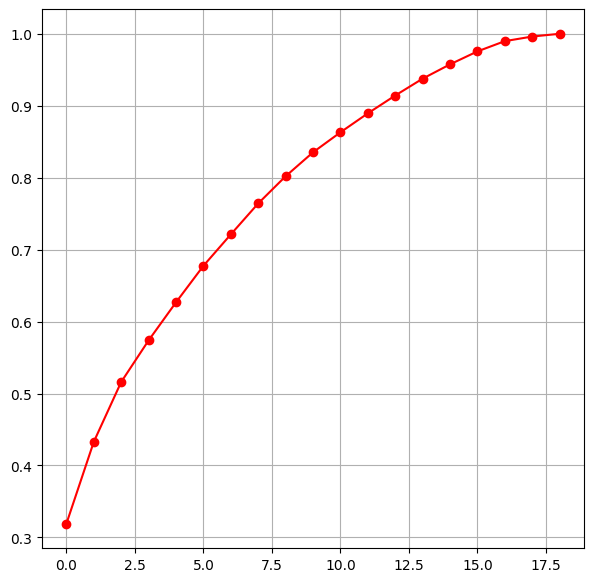

In [1459]:
plt.figure(figsize = (7, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [1460]:
# treinar o modelo
hist = RN.fit(X_XOR, y_XOR, epochs = 200)

Epoch 1/200
177/177 [==============================] - 1s 4ms/step - loss: 0.1465 - binary_accuracy: 0.7827
Epoch 2/200
177/177 [==============================] - 1s 4ms/step - loss: 0.1370 - binary_accuracy: 0.7987
Epoch 3/200
177/177 [==============================] - 0s 3ms/step - loss: 0.1354 - binary_accuracy: 0.8032
Epoch 4/200
177/177 [==============================] - 0s 2ms/step - loss: 0.1342 - binary_accuracy: 0.8024
Epoch 5/200
177/177 [==============================] - 0s 3ms/step - loss: 0.1331 - binary_accuracy: 0.8083
Epoch 6/200
177/177 [==============================] - 1s 3ms/step - loss: 0.1327 - binary_accuracy: 0.8076
Epoch 7/200
177/177 [==============================] - 1s 4ms/step - loss: 0.1319 - binary_accuracy: 0.8072
Epoch 8/200
177/177 [==============================] - 1s 4ms/step - loss: 0.1319 - binary_accuracy: 0.8058
Epoch 9/200
177/177 [==============================] - 0s 3ms/step - loss: 0.1309 - binary_accuracy: 0.8120
Epoch 10/200
177/177 [======

In [1461]:
# avaliar a acurácia da rede neural
RN.evaluate(X_XOR, y_XOR)

177/177 [==============================] - 0s 1ms/step - loss: 0.0997 - binary_accuracy: 0.8633


[0.09967552125453949, 0.8633297681808472]

In [1462]:
type(df_teste3)

pandas.core.frame.DataFrame

In [1463]:
#NORMALIZAR OS DADOS PELA STANDARDSCALER
from sklearn.preprocessing import StandardScaler

# Define o scaler 
SS_teste = StandardScaler().fit(df_teste3)

# Scale o dataframe
df_teste3 = SS.transform(df_teste3)
df_teste3

array([[ 0.99 , -0.434,  1.033, ..., -0.552, -1.481, -0.808],
       [ 0.99 ,  2.303,  1.033, ...,  0.391,  1.144,  1.638],
       [ 0.99 , -0.434, -0.968, ...,  0.391,  0.671,  0.345],
       ...,
       [-1.01 , -0.434,  1.033, ..., -0.552, -0.012,  0.327],
       [ 0.99 ,  2.303,  1.033, ..., -0.552,  0.353, -0.662],
       [ 0.99 , -0.434,  1.033, ..., -1.495,  0.578,  1.475]])

In [1464]:
#df_teste2.set_index('id', drop=True, inplace=True)
X_TESTE = df_teste3

In [1465]:
y_pred = RN.predict_classes(X_TESTE)
y_pred[0:30]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [1466]:
y_pred.shape

(1409, 1)

In [1467]:
type(y_pred)

numpy.ndarray

In [1468]:
df_teste2.index

Int64Index([5027, 1733, 5384, 6554,  364, 2093, 6966, 5076, 5746, 5461,
            ...
            5546, 6847, 3325, 5821, 1805, 4897, 6940,  804, 1143, 5773],
           dtype='int64', name='id', length=1409)

In [1469]:
df_pred = pd.DataFrame(y_pred)
df_pred['id'] = df_teste2.index
df_pred.set_index('id', drop=True, inplace=True)

In [1470]:
df_pred['Churn'] = df_pred[0]
df_pred.drop(columns = 0, axis = 1, inplace=True)
df_pred.head()

,Churn
id,
5027,0
1733,1
5384,0
6554,0
364,0


In [1471]:
df_pred.value_counts()

Churn
0        1075
1         334
dtype: int64

In [1472]:
df_pred.to_csv('predicao7')

NameError: ignored